<a id="sectionx"></a>
# Mambu API - Notebook
* [Introduction](#section0)
* [Branches](#section1)
* [Customer](#section2)
* [Product Types](#section3)
* [Loan Accounts](#section4)
* [Deposit Accounts](#section5)
* [General Ledger - Accounting](#section6)
* [Users](#section7)
* [Tasks](#section8)
* [Documents](#section9)
* [Fees](#section10)

<a id="sectionx"></a>


GitHub: https://github.com/MkershMambu/MambuAPINotebook.git

Viewer: https://nbviewer.jupyter.org/github/MkershMambu/MambuAPINotebook/blob/master/MambuAPINotebook.ipynb ([Force Refresh](https://nbviewer.jupyter.org/github/MkershMambu/MambuAPINotebook/blob/master/MambuAPINotebook.ipynb?flush_cache=true))




<a id="section0"></a>
## Introduction
[Mark Kershaw](https://www.linkedin.com/in/mkersh/): This is my Jupyter notebook to test Mambu API's.

It is **NOT** official Mambu documentation for APIs. For official documention visit:

* https://api.mambu.com/ - For v2.0 APIs
   * OR https://&lt;yourdomain&gt;.sandbox.mambu.com/apidocs/
* https://support.mambu.com/docs/developer - For v1.0 APIs


It is also an evolving document. I will be adding examples of how to do things using the APIs on an incremental basis.

### Notes
1. In General throughout the examples I will be using API v2.0 where possible and only reverting to API 1.0 when necessary.
1. Instructions on how to install the Python Jupyter environment - TBD
1. The JSON API calls in this notebook use helper functions defined in API.py file
1. The API calls can reference environment variable e.g {{env1}}. These environment variables are expected to be defined in a local ENV.py file
1. To call Mambu API v2.0 you always need to send the "Accept: 'application/vnd.mambu.v2+json'" header
1. To execeute individual cells in this notebook use SHIFT+Return



In [196]:
%run API.py
%run ENV.py
from IPython.core.display import HTML
setENV(ENV)

<a id="section1"></a>
[back](#sectionx)
## Branches

### List all branches

In [223]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'FULL'}
r = GET('{{env1}}/branches', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
[
    {
        "addresses": [],
        "branchHolidays": [],
        "creationDate": "2019-04-02T08:06:09+02:00",
        "emailAddress": "",
        "encodedKey": "8a81874769d943930169dca6303d22e8",
        "id": "CollateralTests",
        "lastModifiedDate": "2019-04-02T08:06:09+02:00",
        "name": "CollateralTests",
        "notes": "",
        "phoneNumber": "",
        "state": "ACTIVE"
    },
    {
        "addresses": [],
        "branchHolidays": [],
        "creationDate": "2019-02-26T08:29:59+02:00",
        "emailAddress": "",
        "encodedKey": "8a8186ac692678910169287cf43606af",
        "id": "FUNCTEST",
        "lastModifiedDate": "2019-02-26T08:29:59+02:00",
        "name": "Func Tests",
        "notes": "Test branch to experiment with Mambu functionality",
        "phoneNumber": "",
        "state": "ACTIVE"
    },
    {
        "addresses": [],
        "branchHolidays": [],
        "creationDate": "2019-01-31T17:01:04+02:00",
   

<a id="section2"></a>
[back](#sectionx)
## Customer
* [Get List of Customers](#section2a)
* [Get Individual Customer](#section2b)
* [Create Customer](#section2c)
* [Patch Customer](#section2d)
* [Delete Customer](#section2e)

<a id="section2a"></a>
[back](#section2)
### Get List of Customers

#### Get all customers from a Mambu instance

In [94]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'FULL'}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
# PRINT(r)
printCustomers(r)

 [1] Dominic Giles22
 [2] Harry Styles
 [3] Jim Smith
 [4] MK1 Kershaw
 [5] MPO Test Cust1 Tester3334455
 [6] Bob Diamond
 [7] Sharon Kershaw
 [8] MPO Test James
 [9] Mark Kershaw



#### Get customers using pagination 

*Get first page of results*

In [63]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'paginationDetails': 'ON', 'limit': 2}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
# PRINT(r)
printCustomers(r)

 [1] Dominic Giles22
 [2] Harry Styles



In [60]:
# Info about the page returned in the response headers
print(r.headers)

{'Date': 'Wed, 03 Apr 2019 14:46:18 GMT', 'Content-Type': 'application/vnd.mambu.v2+json', 'Content-Length': '919', 'Connection': 'keep-alive', 'Set-Cookie': 'AWSALB=IvObIkZoXFonU6G9+0rwEP2DT05Qo/RD+QbLLDNoICJh+prileXM5hbkrwshATqVhpQ50DmcLrMzk/w5vJQlHLE4OMvE8/ZeEkUiyV8OTi+FQMBY0/Ibtk/ob954; Expires=Wed, 10 Apr 2019 14:46:15 GMT; Path=/', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains;', 'Session-ID': 'no-session-id', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'Items-Limit': '2', 'Items-Offset': '0', 'Items-Total': '9'}


*Get 2nd page of results*

In [73]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'paginationDetails': 'ON', 'limit': 2, 'offset': 2}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
# PRINT(r)
printCustomers(r)

 [1] Jim Smith
 [2] MK1 Kershaw



*Get 3rd page of results*

In [74]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
# Extract details of where we are upto from the response.headers of the previous result
previousResponseHeaders = r.headers
pageLimit = int(previousResponseHeaders['Items-Limit'])
nextOffset = int(previousResponseHeaders['Items-Offset']) + pageLimit
PARAMS = {'paginationDetails': 'ON', 'limit': pageLimit, 'offset': nextOffset}

r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
# PRINT(r)
printCustomers(r)

2
4
 [1] MPO Test Cust1 Tester3334455
 [2] Bob Diamond



#### Get FULL or BASIC customer details back

detailsLevel := ( FULL | BASIC )


In [75]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'paginationDetails': 'ON', 'limit': 1, 'detailsLevel': 'FULL'}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
[
    {
        "addresses": [
            {
                "city": "Liverpool",
                "country": "UK",
                "encodedKey": "8a81872069e269240169e2e553a3006b",
                "indexInList": 0,
                "parentKey": "8a81872069e269240169e2e553a30069"
            }
        ],
        "approvedDate": "2019-04-03T13:11:13+02:00",
        "assignedBranchKey": "8a8186ac692678910169287cf43606af",
        "clientRoleKey": "8a818e74677a2e9201677ec2b4c336aa",
        "creationDate": "2019-04-03T13:11:13+02:00",
        "encodedKey": "8a81872069e269240169e2e553a30069",
        "firstName": "Dominic",
        "gender": "MALE",
        "groupLoanCycle": 0,
        "id": "697019153",
        "idDocuments": [
            {
                "clientKey": "8a81872069e269240169e2e553a30069",
                "documentId": "0123456789",
                "documentType": "Passport",
                "encodedKey": "8a81872069e269240169e2e553a3006a",
   

In [76]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'paginationDetails': 'ON', 'limit': 1, 'detailsLevel': 'BASIC'}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
[
    {
        "approvedDate": "2019-04-03T13:11:13+02:00",
        "assignedBranchKey": "8a8186ac692678910169287cf43606af",
        "clientRoleKey": "8a818e74677a2e9201677ec2b4c336aa",
        "creationDate": "2019-04-03T13:11:13+02:00",
        "encodedKey": "8a81872069e269240169e2e553a30069",
        "firstName": "Dominic",
        "gender": "MALE",
        "groupLoanCycle": 0,
        "id": "697019153",
        "lastModifiedDate": "2019-04-03T13:11:13+02:00",
        "lastName": "Giles22",
        "loanCycle": 0,
        "preferredLanguage": "ENGLISH",
        "state": "INACTIVE"
    }
]


#### Filter customers on state

state := (PENDING_APPROVAL | INACTIVE | ACTIVE | EXITED | BLACKLISTED | REJECTED)

In [85]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'paginationDetails': 'ON', 'limit': 20, 'state': 'ACTIVE'}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
# PRINT(r)
printCustomers(r)

 [1] Harry Styles
 [2] Jim Smith
 [3] MK1 Kershaw
 [4] Mark Kershaw



#### Filter on firstName

In [86]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'paginationDetails': 'ON', 'limit': 20, 'firstName': 'Jim'}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
# PRINT(r)
printCustomers(r)

 [1] Jim Smith



#### Filter on Branch

In [88]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'paginationDetails': 'ON', 'limit': 20, 'branchId': 'FUNCTEST'}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
# PRINT(r)
printCustomers(r)

 [1] Dominic Giles22
 [2] Jim Smith
 [3] Bob Diamond



#### Filter on Centre

In [92]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'FULL', 'paginationDetails': 'ON', 'limit': 20, 'centreId': 'FCentre1'}
r = GET('{{env1}}/clients', headers=HEADERS, params=PARAMS)
# PRINT(r)
printCustomers(r)

 [1] Bob Diamond



<a id="section2b"></a>
[back](#section2)
### Get Individual Customer

In [98]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'FULL'}
r = GET('{{env1}}/clients/349353166', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
{
    "addresses": [],
    "approvedDate": "2019-01-30T16:16:16+02:00",
    "assignedBranchKey": "8a8187cc689e66fc01689f1c452000d8",
    "clientRoleKey": "8a818e74677a2e9201677ec2b4c336aa",
    "creationDate": "2019-01-30T16:16:15+02:00",
    "encodedKey": "8a8187cc689e66fc01689f1c452000da",
    "firstName": "MPO Test Cust1",
    "groupLoanCycle": 0,
    "id": "349353166",
    "idDocuments": [],
    "lastModifiedDate": "2019-03-01T11:49:57+02:00",
    "lastName": "Tester3334455",
    "loanCycle": 0,
    "middleName": "John1rrr",
    "notes": "",
    "preferredLanguage": "ENGLISH",
    "state": "INACTIVE"
}


<a id="section2c"></a>
[back](#section2)
### Create Customer

In [141]:
%%writefile JSONBODY
{
"firstName": "Dominic",
"lastName": "Smith",
"preferredLanguage": "ENGLISH",
"addresses": [
    {
      "country": "UK",
      "city": "Liverpool"
    }
],
"notes": "Some Notes on this person",
"gender": "MALE",
  
"assignedBranchKey": "8a8186ac692678910169287cf43606af",
"idDocuments": [
	{
	"documentType": "Passport",
    "documentId": "0123456789",
    "issuingAuthority": "UK",
    "validUntil": "2020-02-06",
    "identificationDocumentTemplateKey": "8a81879867f40eff0167f45206e8002b"
    }]
}

Overwriting JSONBODY


In [142]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/clients', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

# Remember the ID of the customer created we will use it below 
newCustomerID = r.json()['id']

API status:
201
Now the JSON:
{"encodedKey":"8a8187b669e3a8ef0169e3ee47d64700","id":"428439285","state":"INACTIVE","creationDate":"2019-04-03T18:01:08+02:00","lastModifiedDate":"2019-04-03T18:01:08+02:00","approvedDate":"2019-04-03T18:01:08+02:00","firstName":"Dominic","lastName":"Smith","preferredLanguage":"ENGLISH","gender":"MALE","notes":"Some Notes on this person","assignedBranchKey":"8a8186ac692678910169287cf43606af","clientRoleKey":"8a818e74677a2e9201677ec2b4c336aa","loanCycle":0,"groupLoanCycle":0,"addresses":[{"encodedKey":"8a8187b669e3a8ef0169e3ee47d64702","parentKey":"8a8187b669e3a8ef0169e3ee47d64700","city":"Liverpool","country":"UK","indexInList":0}],"idDocuments":[{"encodedKey":"8a8187b669e3a8ef0169e3ee47d64701","clientKey":"8a8187b669e3a8ef0169e3ee47d64700","documentType":"Passport","documentId":"0123456789","issuingAuthority":"UK","validUntil":"2020-02-06","indexInList":0,"identificationDocumentTemplateKey":"8a81879867f40eff0167f45206e8002b"}]}


<a id="section2d"></a>
[back](#section2)
### Patch Customer

In [143]:
%%writefile JSONBODY
[
  {
    "op": "ADD",
    "path": "firstName",
    "value": "Jimxxxxx"
  }
]

Overwriting JSONBODY


In [144]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = PATCH('{{env1}}/clients/' + newCustomerID, headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
204
Now the JSON:



In [145]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'BASIC'}
r = GET('{{env1}}/clients/' + newCustomerID, headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
{
    "approvedDate": "2019-04-03T18:01:08+02:00",
    "assignedBranchKey": "8a8186ac692678910169287cf43606af",
    "clientRoleKey": "8a818e74677a2e9201677ec2b4c336aa",
    "creationDate": "2019-04-03T18:01:08+02:00",
    "encodedKey": "8a8187b669e3a8ef0169e3ee47d64700",
    "firstName": "Jimxxxxx",
    "gender": "MALE",
    "groupLoanCycle": 0,
    "id": "428439285",
    "lastModifiedDate": "2019-04-03T18:01:16+02:00",
    "lastName": "Smith",
    "loanCycle": 0,
    "preferredLanguage": "ENGLISH",
    "state": "INACTIVE"
}


<a id="section2e"></a>
[back](#section2)
### Delete Customer

In [146]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {}
r = DELETE("{{env1}}/clients/" + newCustomerID, headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 204
JSON Response:
NO Content


<a id="section3"></a>
[back](#sectionx)
## Product Types

### Get a deposit product type (savings)

In [167]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'FULL'} # NOTE: Only FULL supported
r = GET('{{env1}}/depositproducts/SAV2', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
{
    "accountingSettings": {
        "accountingMethod": "NONE",
        "accountingRules": [],
        "interestAccruedAccountingMethod": "NONE"
    },
    "availabilitySettings": {
        "availableFor": [
            "PURE_GROUPS",
            "INDIVIDUALS"
        ],
        "branchSettings": {
            "availableProductBranches": [],
            "forAllBranches": true
        }
    },
    "creationDate": "2019-01-02T14:10:11+02:00",
    "creditArrangementSettings": {},
    "currencySettings": {
        "currencies": [
            {
                "code": "EUR"
            }
        ]
    },
    "encodedKey": "8a81868e6808ec4501680e43f9dc26e0",
    "feesSettings": {
        "allowArbitraryFees": false,
        "fees": []
    },
    "id": "SAV2",
    "interestSettings": {
        "collectInterestWhenLocked": true,
        "daysInYear": "ACTUAL_365_FIXED",
        "interestCalculationBalance": "AVERAGE",
        "interestPaidIntoAccount": true,
  

### Get a deposit product type (Current)

In [149]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'FULL'} # NOTE: Only FULL supported
r = GET('{{env1}}/depositproducts/CurAcc2', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
{
    "accountingSettings": {
        "accountingMethod": "NONE",
        "accountingRules": [],
        "interestAccruedAccountingMethod": "NONE"
    },
    "availabilitySettings": {
        "availableFor": [
            "PURE_GROUPS",
            "INDIVIDUALS"
        ],
        "branchSettings": {
            "availableProductBranches": [],
            "forAllBranches": true
        }
    },
    "creationDate": "2019-03-04T18:30:50+02:00",
    "creditArrangementSettings": {
        "creditArrangementRequirement": "OPTIONAL"
    },
    "currencySettings": {
        "currencies": [
            {
                "code": "EUR"
            }
        ]
    },
    "encodedKey": "8a8186aa69491c25016949888aeb10d2",
    "feesSettings": {
        "allowArbitraryFees": true,
        "fees": [
            {
                "accountingRules": [],
                "amountCalculationMethod": "FLAT",
                "creationDate": "2019-03-23T14:06:05+02:00",
         

### Get a loan product type

In [150]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'FULL'} # NOTE: Only FULL supported
r = GET('{{env1}}/loanproducts/LD0201', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
{
    "accountLinkSettings": {
        "enabled": false,
        "linkedAccountOptions": [],
        "settlementMethod": "FULL_DUE_AMOUNTS"
    },
    "accountingSettings": {
        "accountingMethod": "NONE",
        "accountingRules": [],
        "interestAccruedAccountingMethod": "NONE"
    },
    "allowCustomRepaymentAllocation": false,
    "arrearsSettings": {
        "dateCalculationMethod": "ACCOUNT_FIRST_WENT_TO_ARREARS",
        "encodedKey": "8a81868e6808ec4501680e7a4deb26f6",
        "nonWorkingDaysMethod": "EXCLUDED",
        "toleranceCalculationMethod": "ARREARS_TOLERANCE_PERIOD",
        "tolerancePeriod": {
            "defaultValue": 0,
            "maxValue": 0,
            "minValue": 0
        }
    },
    "availabilitySettings": {
        "availableFor": [
            "INDIVIDUALS"
        ],
        "branchSettings": {
            "availableProductBranches": [],
            "forAllBranches": true
        }
    },
    "creationDate":

### Create  a new deposit product 
Best advice here is to GET an existing deposit product and then make adjustments 

In [152]:
%%writefile JSONBODY
{
  "notes": "New Deposit Product",
 
  "availabilitySettings": {
    "branchSettings": {
      "forAllBranches": true
    },
    "availableFor": [
      "INDIVIDUALS"
    ]
  },
  
  "type": "CURRENT_ACCOUNT",
  "creditArrangementSettings": {
    "creditArrangementRequirement": "OPTIONAL"
  },
  "currencySettings": {
    "currencies": [
      {
        "code": "EUR"
      }
    ]
  },
  
  "newAccountSettings": {
    "idGeneratorType": "INCREMENTAL_NUMBER",
    "idPattern": "@@@@###"
  },
  "interestSettings": {
    "interestRateSettings": {
      "interestRate": {
        "minValue": 0.1,
        "maxValue": 5,
        "defaultValue": 1
      },
      "interestRateSource": "FIXED_INTEREST_RATE",
      "interestChargeFrequency": "ANNUALIZED",
      "accrueInterestAfterMaturity": true,
      "interestRateTerms": "FIXED",
      "interestChargeFrequencyCount": 1
    },
    "collectInterestWhenLocked": true,
    "interestCalculationBalance": "MINIMUM",
    "interestPaidIntoAccount": true,
    "daysInYear": "ACTUAL_365_FIXED",
    "interestPaymentSettings": {
     
      "interestPaymentPoint": "FIRST_DAY_OF_MONTH"
    }
  },
  "accountingSettings": {
    "accountingMethod": "NONE",
    "interestAccruedAccountingMethod": "NONE"
  },
  "name": "MKDep03042019",
  "id": "MKDep03042019",
  "state": "ACTIVE",
  "overdraftSettings": {
    "allowOverdraft": false,
    "allowTechnicalOverdraft": false,
    "maxOverdraftLimit": 0
  },
  "internalControls": {
    "dormancyPeriodDays": 0,
    "recommendedDepositAmount": 0,
    "openingBalance": {
      "minValue": 0,
      "maxValue": 0,
      "defaultValue": 0
    },
    "maxWithdrawalAmount": 0
  }
}

Overwriting JSONBODY


In [158]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/depositproducts', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a8187e369e403830169e4103e5f002e","id":"MKDep03042019","creationDate":"2019-04-03T18:38:06+02:00","lastModifiedDate":"2019-04-03T18:38:06+02:00","name":"MKDep03042019","notes":"New Deposit Product","type":"CURRENT_ACCOUNT","state":"ACTIVE","newAccountSettings":{"idGeneratorType":"INCREMENTAL_NUMBER","idPattern":"@@@@###"},"interestSettings":{"interestPaidIntoAccount":true,"interestRateSettings":{"interestRate":{"minValue":0.1,"maxValue":5,"defaultValue":1},"interestRateSource":"FIXED_INTEREST_RATE","interestRateTerms":"FIXED","interestChargeFrequency":"ANNUALIZED","interestChargeFrequencyCount":1,"encodedKey":"8a8187e369e403830169e4103e5f002f","accrueInterestAfterMaturity":true,"interestRateTiers":[]},"interestCalculationBalance":"MINIMUM","interestPaymentSettings":{"interestPaymentPoint":"FIRST_DAY_OF_MONTH","interestPaymentDates":[]},"collectInterestWhenLocked":true,"daysInYear":"ACTUAL_365_FIXED"},"overdraftInterestSettings":{},"overdraft

### Delete a Deposit product type

In [157]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {}
r = DELETE("{{env1}}/depositproducts/MKDep03042019", headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 204
JSON Response:
NO Content


### Create a new Loan Product Type
Best advice here is to GET an existing deposit product and then make adjustments

In [162]:
%%writefile JSONBODY
{
  
  "id": "MKLoan03042019",
  "name": "MKLoan03042019",
  "notes": "",
  "type": "TRANCHED_LOAN",
  "state": "ACTIVE",
  "loanAmountSettings": {
    "loanAmount": {
      "minValue": 5000.0000000000,
      "maxValue": 1000000.0000000000,
      "defaultValue": 20000.0000000000
    },
    "trancheSettings": {
      "maxNumberOfTranches": 100
    }
  },
  "scheduleSettings": {
    "repaymentScheduleMethod": "DYNAMIC",
    "scheduleDueDatesMethod": "INTERVAL",
    "defaultRepaymentPeriodCount": 1,
    "repaymentPeriodUnit": "MONTHS",
    "fixedDaysOfMonth": [],
    "roundingSettings": {
      "roundingRepaymentScheduleMethod": "ROUND_REMAINDER_INTO_LAST_REPAYMENT",
      "repaymentCurrencyRounding": "NO_ROUNDING",
      "repaymentElementsRoundingMethod": "NO_ROUNDING"
    },
    "numInstallments": {},
    "firstRepaymentDueDateOffset": {},
    "repaymentScheduleEditOptions": [],
    "repaymentReschedulingMethod": "NEXT_WORKING_DAY"
  },
  "paymentSettings": {
    "paymentMethod": "HORIZONTAL",
    "amortizationMethod": "STANDARD_PAYMENTS",
    "prepaymentSettings": {
      "prepaymentRecalculationMethod": "RESCHEDULE_REMAINING_REPAYMENTS",
      "prepaymentAcceptance": "ACCEPT_PREPAYMENTS",
      "futurePaymentsAcceptance": "NO_FUTURE_PAYMENTS",
      "applyInterestOnPrepaymentMethod": "AUTOMATIC",
      "principalPaidInstallmentStatus": "PARTIALLY_PAID"
    },
    "latePaymentsRecalculationMethod": "OVERDUE_INSTALLMENTS_INCREASE",
    "repaymentAllocationOrder": [
      "FEE",
      "PENALTY",
      "INTEREST",
      "PRINCIPAL"
    ],
    "principalPaymentSettings": {
      "amount": {},
      "percentage": {},
      "defaultPrincipalRepaymentInterval": 1
    }
  },
  "gracePeriodSettings": {
    "gracePeriod": {},
    "gracePeriodType": "NONE"
  },
  "newAccountSettings": {
    "idGeneratorType": "RANDOM_PATTERN",
    "idPattern": "@@@@###",
    "accountInitialState": "PENDING_APPROVAL"
  },
  "interestSettings": {
    "interestApplicationMethod": "REPAYMENT_DUE_DATE",
    "interestBalanceCalculationMethod": "ONLY_PRINCIPAL",
    "interestCalculationMethod": "DECLINING_BALANCE",
    "daysInYear": "E30_360",
    "scheduleInterestDaysCountMethod": "ACTUAL_DAYS_COUNT",
    "interestType": "SIMPLE_INTEREST",
    "indexRateSettings": {
      "interestRate": {
        "minValue": 2.00000000000000000000,
        "maxValue": 2.00000000000000000000,
        "defaultValue": 2.00000000000000000000
      },
      "interestRateSource": "FIXED_INTEREST_RATE",
      "interestRateTerms": "FIXED",
      "interestChargeFrequency": "ANNUALIZED",
      "interestChargeFrequencyCount": 1,
      "encodedKey": "8a8187f467e0b11f0167e0bdea870014",
      "accrueInterestAfterMaturity": false,
      "interestRateTiers": []
    }
  },
  "penaltySettings": {
    "penaltyRate": {},
    "loanPenaltyCalculationMethod": "NONE"
  },
  "arrearsSettings": {
    "encodedKey": "8a8187f467e0b11f0167e0bdea870015",
    "toleranceCalculationMethod": "ARREARS_TOLERANCE_PERIOD",
    "dateCalculationMethod": "ACCOUNT_FIRST_WENT_TO_ARREARS",
    "nonWorkingDaysMethod": "EXCLUDED",
    "tolerancePeriod": {}
  },
  "feesSettings": {
    "allowArbitraryFees": false,
    "fees": []
  },
  "accountingSettings": {
    "accountingMethod": "NONE",
    "interestAccruedAccountingMethod": "NONE",
    "accountingRules": []
  },
  "accountLinkSettings": {
    "enabled": false,
    "linkedAccountOptions": [],
    "settlementMethod": "FULL_DUE_AMOUNTS"
  },
  "taxSettings": {
    "taxesOnInterestEnabled": false,
    "taxesOnFeesEnabled": false,
    "taxesOnPenaltyEnabled": false
  },
  "internalControls": {
    "lockSettings": {}
  },
  "securitySettings": {
    "isGuarantorsEnabled": false,
    "isCollateralEnabled": false
  },
  "creditArrangementSettings": {
    "creditArrangementRequirement": "OPTIONAL"
  },
  "fundingSettings": {
    "enabled": false
  },
  "availabilitySettings": {
    "branchSettings": {
      "forAllBranches": true,
      "availableProductBranches": []
    },
    "availableFor": [
      "INDIVIDUALS"
    ]
  },
  "offsetSettings": {},
  "allowCustomRepaymentAllocation": false
}

Overwriting JSONBODY


In [166]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/loanproducts', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a8187b669e3a8ef0169e415145b480d","creationDate":"2019-04-03T18:43:00+02:00","lastModifiedDate":"2019-04-03T18:43:00+02:00","id":"MKLoan03042019","name":"MKLoan03042019","notes":"","type":"TRANCHED_LOAN","state":"ACTIVE","loanAmountSettings":{"loanAmount":{"minValue":5000.0000000000,"maxValue":1000000.0000000000,"defaultValue":20000.0000000000},"trancheSettings":{"maxNumberOfTranches":100}},"scheduleSettings":{"repaymentScheduleMethod":"DYNAMIC","scheduleDueDatesMethod":"INTERVAL","defaultRepaymentPeriodCount":1,"repaymentPeriodUnit":"MONTHS","fixedDaysOfMonth":[],"roundingSettings":{"roundingRepaymentScheduleMethod":"ROUND_REMAINDER_INTO_LAST_REPAYMENT","repaymentCurrencyRounding":"NO_ROUNDING","repaymentElementsRoundingMethod":"NO_ROUNDING"},"numInstallments":{},"firstRepaymentDueDateOffset":{},"repaymentScheduleEditOptions":[],"repaymentReschedulingMethod":"NEXT_WORKING_DAY"},"paymentSettings":{"paymentMethod":"HORIZONTAL","amortizationMe

### Delete a Loan product type

In [165]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {}
r = DELETE("{{env1}}/loanproducts/MKLoan03042019", headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 204
JSON Response:
NO Content


<a id="section4"></a>
[back](#sectionx)
## Loan Accounts


### Get all Loans

In [169]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
# Parameters below set up pagination and only returns max 20
PARAMS = {'detailsLevel': 'BASIC', 'paginationDetails': 'ON','limit': 20}
r = GET('{{env1}}/loans', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
[
    {
        "accountArrearsSettings": {
            "dateCalculationMethod": "ACCOUNT_FIRST_WENT_TO_ARREARS",
            "encodedKey": "8a8186c667c60e0a0167c6d5ab6e076b",
            "nonWorkingDaysMethod": "EXCLUDED",
            "toleranceCalculationMethod": "ARREARS_TOLERANCE_PERIOD",
            "tolerancePeriod": 0
        },
        "accountHolderKey": "8a81872d6787e9f30167a348cc214e28",
        "accountHolderType": "CLIENT",
        "accountState": "ACTIVE_IN_ARREARS",
        "accruedInterest": 0.0,
        "accruedPenalty": 0.0,
        "activationTransactionKey": "8a8186c667c60e0a0167c6d82d7107d8",
        "allowOffset": false,
        "approvedDate": "2018-12-19T15:21:54+02:00",
        "arrearsTolerancePeriod": 0,
        "balances": {
            "feesBalance": 674.92,
            "feesDue": 674.92,
            "feesPaid": 0.0,
            "interestBalance": 0.0,
            "interestDue": 0.0,
            "interestFromArrearsBalance": 0

In [172]:
print("Total Number of Loans in this instance:")
r.headers['Items-Total']

Total Number of Loans in this instance:


'40'

### Get Individual Loan

In [175]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
PARAMS = {'detailsLevel': 'FULL'}
r = GET('{{env1}}/loans/SQKP990', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
{
    "accountArrearsSettings": {
        "dateCalculationMethod": "ACCOUNT_FIRST_WENT_TO_ARREARS",
        "encodedKey": "8a8187df69b5486f0169b59708c90187",
        "nonWorkingDaysMethod": "EXCLUDED",
        "toleranceCalculationMethod": "ARREARS_TOLERANCE_PERIOD",
        "tolerancePeriod": 0
    },
    "accountHolderKey": "8a8186ac692678910169288509c606bc",
    "accountHolderType": "CLIENT",
    "accountState": "ACTIVE_IN_ARREARS",
    "accruedInterest": 7.13,
    "accruedPenalty": 0.0,
    "activationTransactionKey": "8a8187df69b5486f0169b5970c6a0192",
    "allowOffset": false,
    "approvedDate": "2019-03-25T17:03:11+02:00",
    "arrearsTolerancePeriod": 0,
    "assets": [],
    "assignedBranchKey": "8a8186ac692678910169287cf43606af",
    "balances": {
        "feesBalance": 0.0,
        "feesDue": 0.0,
        "feesPaid": 0.0,
        "interestBalance": 3.03,
        "interestDue": 3.03,
        "interestFromArrearsBalance": 1.36,
        "interest

<a id="section5"></a>
[back](#sectionx)
## Deposit Accounts


### Get all Deposit account

In [177]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
# Parameters below set up pagination and only returns max 20
PARAMS = {'detailsLevel': 'BASIC', 'paginationDetails': 'ON','limit': 20}
r = GET('{{env1}}/deposits', headers=HEADERS, params=PARAMS)
PRINT(r)

API status: 200
JSON Response:
[
    {
        "accountHolderKey": "8a8186ac692678910169288509c606bc",
        "accountHolderType": "CLIENT",
        "accountState": "ACTIVE",
        "accountType": "REGULAR_SAVINGS",
        "accruedAmounts": {
            "interestAccrued": 0.2194783562,
            "overdraftInterestAccrued": 0.0,
            "technicalOverdraftInterestAccrued": 0.0
        },
        "activationDate": "2019-03-07T15:57:42+02:00",
        "approvedDate": "2019-03-07T15:57:25+02:00",
        "assignedBranchKey": "8a8186ac692678910169287cf43606af",
        "balances": {
            "availableBalance": 2002.74,
            "feesDue": 0.0,
            "holdBalance": 0.0,
            "lockedBalance": 0.0,
            "overdraftAmount": 0.0,
            "overdraftInterestDue": 0.0,
            "technicalOverdraftAmount": 0.0,
            "technicalOverdraftInterestDue": 0.0,
            "totalBalance": 2002.74
        },
        "creationDate": "2019-03-06T20:01:28+02:00"

In [178]:
print("Total Number of Deposit Accounts in this instance:")
r.headers['Items-Total']

Total Number of Deposit Accounts in this instance:


'18'

### Get individual deposit Account

In [180]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
# Parameters below set up pagination and only returns max 20
PARAMS = {'detailsLevel': 'FULL', 'paginationDetails': 'ON','limit': 20}
r = GET('{{env1}}/deposits/XDSB665', headers=HEADERS, params=PARAMS)
print(r.text)

{"encodedKey":"8a8187d4695381f20169542adb4860fe","creationDate":"2019-03-06T20:01:28+02:00","lastModifiedDate":"2019-04-03T00:16:46+02:00","id":"XDSB665","name":"Savings2","notes":"","accountHolderType":"CLIENT","accountHolderKey":"8a8186ac692678910169288509c606bc","accountState":"ACTIVE","productTypeKey":"8a81868e6808ec4501680e43f9dc26e0","accountType":"REGULAR_SAVINGS","approvedDate":"2019-03-07T15:57:25+02:00","activationDate":"2019-03-07T15:57:42+02:00","lastInterestCalculationDate":"2019-04-03T00:00:00+02:00","lastInterestStoredDate":"2019-04-01T00:00:00+02:00","lastAccountAppraisalDate":"2019-04-03T00:16:46+02:00","currencyCode":"EUR","assignedBranchKey":"8a8186ac692678910169287cf43606af","internalControls":{},"overdraftSettings":{"allowOverdraft":false,"overdraftLimit":0E-10},"interestSettings":{"interestRateSettings":{"encodedKey":"8a8187d4695381f20169542adb4860ff","interestRate":2.00000000000000000000,"interestChargeFrequency":"ANNUALIZED","interestChargeFrequencyCount":1,"int

### Create Current Account (with overdraft) 

In [182]:
%%writefile JSONBODY
{
  "overdraftSettings": {
	"allowOverdraft": true,
	"overdraftLimit": 0
  },
  "accountType": "CURRENT_ACCOUNT",
  "name": "MKCurTest1",
  "accountHolderKey": "8a8186ac692678910169288509c606bc",
  "productTypeKey": "8a8186aa69491c25016949888aeb10d2",
  "currencyCode": "EUR",
  "accountHolderType": "CLIENT"
}


Overwriting JSONBODY


In [184]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/deposits', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a8187a669e3b3030169e4105e153756","creationDate":"2019-04-03T19:04:20+02:00","lastModifiedDate":"2019-04-03T19:04:20+02:00","id":"REQT533","name":"MKCurTest1","accountHolderType":"CLIENT","accountHolderKey":"8a8186ac692678910169288509c606bc","accountState":"PENDING_APPROVAL","productTypeKey":"8a8186aa69491c25016949888aeb10d2","accountType":"CURRENT_ACCOUNT","currencyCode":"EUR","assignedBranchKey":"8a8186ac692678910169287cf43606af","internalControls":{},"overdraftSettings":{"allowOverdraft":true,"overdraftLimit":0},"interestSettings":{"interestPaymentSettings":{"interestPaymentDates":[]}},"overdraftInterestSettings":{"interestRateSettings":{"encodedKey":"8a8187a669e3b3030169e4105e153757","interestRate":0E-20,"interestChargeFrequency":"ANNUALIZED","interestChargeFrequencyCount":1,"interestRateTiers":[],"interestRateTerms":"FIXED","interestRateSource":"FIXED_INTEREST_RATE"}},"balances":{"overdraftAmount":0,"technicalOverdraftAmount":0,"lockedB

### Create deposit Account (API v1.0)

In [187]:
%%writefile JSONBODY
{
	"savingsAccount":{
      "accountHolderKey":"8a8186ac692678910169288509c606bc",
      "accountHolderType":"CLIENT",
      "productTypeKey":"8a81868e6808ec4501680e43f9dc26e0",
      "accountType":"REGULAR_SAVINGS",
      "accountState":"PENDING_APPROVAL"
		 
   }
}


Overwriting JSONBODY


In [188]:
HEADERS = {'Content-Type': 'application/json'}
# To call an API v1.0 API drop the header: 'Accept': 'application/vnd.mambu.v2+json'
PARAMS = {}
r = POST('{{env1}}/savings/', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"savingsAccount":{"encodedKey":"8a81865569e40c410169e41087570006","id":"ATZY592","accountHolderKey":"8a8186ac692678910169288509c606bc","accountHolderType":"CLIENT","creationDate":"2019-04-03T17:08:09+0000","lastModifiedDate":"2019-04-03T17:08:09+0000","productTypeKey":"8a81868e6808ec4501680e43f9dc26e0","accountType":"REGULAR_SAVINGS","accountState":"PENDING_APPROVAL","balance":"0","accruedInterest":"0","overdraftInterestAccrued":"0","technicalOverdraftInterestAccrued":"0","overdraftAmount":"0","technicalOverdraftAmount":"0","interestSettings":{"interestRate":"2","encodedKey":"8a81865569e40c410169e41087570007","interestChargeFrequency":"ANNUALIZED","interestChargeFrequencyCount":1,"interestRateSource":"FIXED_INTEREST_RATE","interestRateTerms":"FIXED","interestRateTiers":[],"accrueInterestAfterMaturity":false},"interestDue":"0","technicalInterestDue":"0","feesDue":"0","overdraftLimit":"0","allowOverdraft":false,"assignedBranchKey":"8a8186ac692678910169287cf

### Transfer from a Deposit account

In [191]:
%%writefile JSONBODY
{
  "externalId": "extID241",
  "amount": 897,
  "notes": "Transfer Notes",
  "transferDetails": {
    "linkedAccountId": "ADRO254",
		"linkedAccountType": "DEPOSIT",
    "linkedAccountKey": "8a81868e6808ec4501680e7898bf26e5"
  }
}

Overwriting JSONBODY


In [192]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/deposits/KIXN632/transfer-transactions', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a8186ab69e3a9ba0169e3dd6cc847e9","id":"68","externalId":"extID241","creationDate":"2019-04-03T19:10:58+02:00","valueDate":"2019-04-03T19:10:58+02:00","notes":"Transfer Notes","parentAccountKey":"8a8186b967c08f660167c0c60ae40066","type":"TRANSFER","amount":-897,"currencyCode":"EUR","affectedAmounts":{"fundsAmount":897.0000000000,"interestAmount":0,"feesAmount":0,"overdraftAmount":0E-10,"overdraftFeesAmount":0,"overdraftInterestAmount":0,"technicalOverdraftAmount":0E-10,"technicalOverdraftInterestAmount":0,"fractionAmount":0},"taxes":{},"accountBalances":{"totalBalance":48485.6300000000},"userKey":"8a8186ac69267891016928db604e0735","terms":{"interestSettings":{},"overdraftInterestSettings":{},"overdraftSettings":{}},"transactionDetails":{},"transferDetails":{"linkedDepositTransactionKey":"8a8186ab69e3a9ba0169e42eaf2c496c"},"fees":[]}


### Update overdraft limit on a deposit account (API v1.0)

Struggling to get this working on API v2.0 at-the-moment. Will provide an update for v2.0 when I figure it out.

In [194]:
%%writefile JSONBODY
{
   "savingsAccount":{
      "overdraftLimit":"500"
   }
}

Overwriting JSONBODY


In [195]:
HEADERS = {'Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/savings/NXWB628', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
400
Now the JSON:
{"returnCode":2809,"returnStatus":"INVALID_INTEREST_PAYMENT_DATES","errorSource":"The interest payment dates does not match the value from the product"}


<a id="section6"></a>
[back](#sectionx)
## General Ledger - Accounting (API v1.0 )
    


### Get Journal entries

In [199]:
HEADERS = {}
PARAMS = {'from': '2019-03-01','to':'2019-03-01','limit':30}
r = GET('{{env2}}/gljournalentries', headers=HEADERS, params=PARAMS)
print(r.text)
#PRINT(r) # This will print in a more readable format

API status: 200
JSON Response:
[
    {
        "accountKey": "8a8587d869e02db70169e29c117141a9",
        "amount": "58228.16",
        "bookingDate": "2019-03-01T00:00:00+0000",
        "creationDate": "2019-04-03T09:54:06+0000",
        "encodedKey": "8a8587d869e02db70169e29eb3e444a0",
        "entryDate": "2019-03-01T00:00:00+0000",
        "entryID": 25546,
        "glAccount": {
            "activated": true,
            "allowManualJournalEntries": true,
            "creationDate": "2017-07-20T09:24:47+0000",
            "encodedKey": "8a858e8c5d5b8982015d5f50580339ec",
            "glCode": "22000",
            "lastModifiedDate": "2017-07-20T09:24:47+0000",
            "name": "Client Savings",
            "stripTrailingZeros": true,
            "type": "LIABILITY",
            "usage": "DETAIL"
        },
        "productKey": "8a8587d869e02db70169e2949c6238ee",
        "productType": "SAVINGS",
        "transactionID": "356",
        "type": "CREDIT",
        "userKey": "8a858

<a id="section7"></a>
[back](#sectionx)
## Users


### Get all users

In [225]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
# Parameters below set up pagination and only returns max 20
PARAMS = {'detailsLevel': 'FULL', 'paginationDetails': 'ON','limit': 20}
r = GET('{{env1}}/users', headers=HEADERS, params=PARAMS)
print(r.text)

[{"encodedKey":"8a818e74677a2e9201677ec2ac0a3696","id":"2","creationDate":"2018-12-05T16:25:47+02:00","lastModifiedDate":"2019-04-03T13:26:50+02:00","lastLoggedInDate":"2019-04-03T13:26:50+02:00","access":{"permissions":["AUDIT_TRANSACTIONS","VIEW_COMMENTS","CREATE_COMMENTS","EDIT_COMMENTS","DELETE_COMMENTS","CREATE_INDEX_RATE","DOWNLOAD_BACKUPS","IMPORT_DATA","EXPORT_TO_EXCEL","VIEW_EXCHANGE_RATES","CREATE_EXCHANGE_RATE","VIEW_CENTRE_DETAILS","CREATE_CENTRE","EDIT_CENTRE","VIEW_BRANCH_DETAILS","CREATE_BRANCH","EDIT_BRANCH","CREATE_COMMUNICATION_TEMPLATES","EDIT_COMMUNICATION_TEMPLATES","SEND_MANUAL_SMS","SEND_MANUAL_EMAIL","VIEW_COMMUNICATION_HISTORY","RESEND_FAILED_MESSAGES","VIEW_LOAN_PRODUCT_DETAILS","CREATE_LOAN_PRODUCT","EDIT_LOAN_PRODUCT","DELETE_LOAN_PRODUCTS","VIEW_SAVINGS_PRODUCT_DETAILS","CREATE_SAVINGS_PRODUCT","EDIT_SAVINGS_PRODUCT","DELETE_SAVINGS_PRODUCT","CREATE_PRODUCT_DOCUMENT_TEMPLATES","EDIT_PRODUCT_DOCUMENT_TEMPLATES","DELETE_PRODUCT_DOCUMENT_TEMPLATES","VIEW_CLIEN

    
<a id="section8"></a>
[back](#sectionx)
## Tasks


### Get all Tasks

In [203]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
# Parameters below set up pagination and only returns max 20
PARAMS = {'detailsLevel': 'FULL', 'paginationDetails': 'ON','limit': 20}
r = GET('{{env1}}/tasks', headers=HEADERS, params=PARAMS)
print(r.text)

[{"encodedKey":"8a81878f6934e6bf01693522621e0bc7","id":31,"creationDate":"2019-02-28T19:24:00+02:00","lastModifiedDate":"2019-03-03T14:04:52+02:00","dueDate":"1987-04-26","title":"API Task","description":"Task Created from API","createdByUserKey":"8a8186ac69267891016928db604e0735","status":"COMPLETED","createdByFullName":"API User","assignedUserKey":"8a818e74677a2e9201677ec2ac0a3696","taskLinkKey":"8a8186ac692678910169288509c606bc","taskLinkType":"CLIENT"},{"encodedKey":"8a81878f6934e6bf01693522f3870c0e","id":35,"creationDate":"2019-02-28T19:27:09+02:00","lastModifiedDate":"2019-03-03T14:04:53+02:00","dueDate":"1987-04-26","title":"API Task","description":"Task Created from <b>API</b>","createdByUserKey":"8a8186ac69267891016928db604e0735","status":"COMPLETED","createdByFullName":"API User","assignedUserKey":"8a818e74677a2e9201677ec2ac0a3696","taskLinkType":"CLIENT"},{"encodedKey":"8a81878f6934e6bf01693522f3870c10","id":36,"creationDate":"2019-02-28T19:27:29+02:00","lastModifiedDate":"2

### Create Task - General

In [205]:
%%writefile JSONBODY
{
  "dueDate": "1987-04-26",
  "description": "Task Created from <b>API</b>",
  "title": "Global Task - Sort yourself out",
  
  "assignedUserKey": "8a818e74677a2e9201677ec2ac0a3696",
  "status": "OPEN"
}

Overwriting JSONBODY


In [206]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/tasks', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a8187e369e403830169e41098cb0033","id":41,"creationDate":"2019-04-03T20:10:00+02:00","lastModifiedDate":"2019-04-03T20:10:00+02:00","dueDate":"1987-04-26","title":"Global Task - Sort yourself out","description":"Task Created from <b>API</b>","createdByUserKey":"8a8186ac69267891016928db604e0735","status":"OPEN","assignedUserKey":"8a818e74677a2e9201677ec2ac0a3696","taskLinkType":"CLIENT"}


### Create Task - Linked to a client

In [207]:
%%writefile JSONBODY
{
  "dueDate": "1987-04-26",
  "description": "Task Created from API",
  "title": "API Task",
  "taskLinkKey": "8a8186ac692678910169288509c606bc",
  "assignedUserKey": "8a818e74677a2e9201677ec2ac0a3696",
  "taskLinkType": "CLIENT",
  "status": "OPEN"
}

Overwriting JSONBODY


In [208]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/tasks', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a8187e369e403830169e41098cb0035","id":42,"creationDate":"2019-04-03T20:11:43+02:00","lastModifiedDate":"2019-04-03T20:11:43+02:00","dueDate":"1987-04-26","title":"API Task","description":"Task Created from API","createdByUserKey":"8a8186ac69267891016928db604e0735","status":"OPEN","assignedUserKey":"8a818e74677a2e9201677ec2ac0a3696","taskLinkKey":"8a8186ac692678910169288509c606bc","taskLinkType":"CLIENT"}


    
<a id="section9"></a>
[back](#sectionx)
## Documents


### Get Customer Documents (API v1.0)

In [209]:
HEADERS = {}
PARAMS = {'offset':0, 'limit':5}
r = GET('{{env1}}/clients/121693087/documents', headers=HEADERS, params=PARAMS)
print(r.text)

[{"encodedKey":"8a81878f6934e6bf0169354b7561171b","id":11,"creationDate":"2019-02-28T18:08:51+0000","lastModifiedDate":"2019-02-28T18:08:51+0000","documentHolderKey":"8a8186ac692678910169288509c606bc","documentHolderType":"CLIENT","name":"client_information","type":"jpg","fileSize":35594,"originalFilename":"client_information.jpg","location":"LFGWULPIXPDKIINEVIKOTKHCSSNCCV","createdByUserKey":"8a8186ac69267891016928db604e0735","userName":"API User"},{"encodedKey":"8a8186b66934f24e0169353128130e90","id":1,"creationDate":"2019-02-28T17:52:24+0000","lastModifiedDate":"2019-02-28T17:52:24+0000","documentHolderKey":"8a8186ac692678910169288509c606bc","documentHolderType":"CLIENT","name":"Wallpaper","type":"jpg","fileSize":126869,"originalFilename":"Photo_on_28-02-2019_at_16.53.jpg","location":"XBNTMADQTKGQYGTBKQMGPJLRRJCUTD","description":"Wallpaper doc","createdByUserKey":"8a818e74677a2e9201677ec2ac0a3696","userName":"Mark Kershaw"}]


### Add Customer Document

In [212]:
HEADERS = {'Content-Type': 'application/json'}
PARAMS = {}
# DOC1.json is stored in a separate file
r = POST('{{env1}}/documents', headers=HEADERS, params=PARAMS, body="DOC1.json")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a81865569e40c410169e41087570009","id":21,"creationDate":"2019-04-03T18:18:39+0000","lastModifiedDate":"2019-04-03T18:18:39+0000","documentHolderKey":"8a8186ac692678910169288509c606bc","documentHolderType":"CLIENT","name":"client_information","type":"jpg","fileSize":35594,"originalFilename":"client_information.jpg","location":"ZYWZULVXUFTGCKXHCZTEEGKCTHAQUV","createdByUserKey":"8a8186ac69267891016928db604e0735"}


### Get image (and its base64 encoding)

""

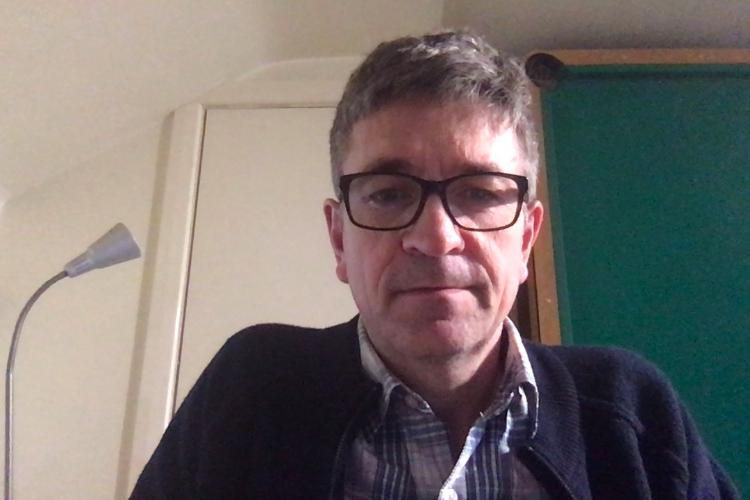

In [213]:
HEADERS = {}
PARAMS = {'offset':0, 'limit':5}
r = GET('{{env1}}/images/8a81872869349860016934f018710a5d', headers=HEADERS, params=PARAMS)
print(r.text)

    
<a id="section10"></a>
[back](#sectionx)
## Fees

### Apply a Manual Fee to deposit account

In [215]:
# This is the account that we are going to apply a fee to
HEADERS = {'Accept': 'application/vnd.mambu.v2+json'}
# Parameters below set up pagination and only returns max 20
PARAMS = {'detailsLevel': 'FULL'}
r = GET('{{env1}}/deposits/WPNW605', headers=HEADERS, params=PARAMS)
print(r.text)

{"encodedKey":"8a8186aa69491c2501694993850d1314","creationDate":"2019-03-04T18:40:42+02:00","lastModifiedDate":"2019-04-03T00:16:45+02:00","id":"WPNW605","name":"Current Account2","notes":"","accountHolderType":"CLIENT","accountHolderKey":"8a8186ac692678910169288509c606bc","accountState":"ACTIVE_IN_ARREARS","productTypeKey":"8a8186aa69491c25016949888aeb10d2","accountType":"CURRENT_ACCOUNT","approvedDate":"2019-03-04T17:55:34+02:00","activationDate":"2019-03-04T18:03:39+02:00","lastAccountAppraisalDate":"2019-04-03T00:16:46+02:00","lastSetToArrearsDate":"2019-03-04T00:00:00+02:00","currencyCode":"EUR","assignedBranchKey":"8a8186ac692678910169287cf43606af","internalControls":{},"overdraftSettings":{"allowOverdraft":true,"overdraftLimit":0E-10},"interestSettings":{"interestPaymentSettings":{"interestPaymentDates":[]}},"overdraftInterestSettings":{"interestRateSettings":{"encodedKey":"8a8186aa69491c250169499430a5132e","interestRate":2.00000000000000000000,"interestChargeFrequency":"ANNUALI

In [217]:
%%writefile JSONBODY
{
  "amount": 2000,
  "notes": "Testing Fee1",
  "predefinedFeeKey": "8a8186aa69491c2501694993850d1311"
}

Overwriting JSONBODY


In [218]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/deposits/WPNW605/fee-transactions', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a81866769e401db0169e41501c8005c","id":"70","creationDate":"2019-04-03T20:25:56+02:00","valueDate":"2019-04-03T20:25:56+02:00","notes":"Testing Fee1","parentAccountKey":"8a8186aa69491c2501694993850d1314","type":"FEE_APPLIED","amount":-2000,"currencyCode":"EUR","affectedAmounts":{"fundsAmount":0,"interestAmount":0,"feesAmount":0,"overdraftAmount":0,"overdraftFeesAmount":2000.0000000000,"overdraftInterestAmount":0,"technicalOverdraftAmount":0,"technicalOverdraftInterestAmount":0,"fractionAmount":0},"taxes":{},"accountBalances":{"totalBalance":-8614.0000000000},"userKey":"8a8186ac69267891016928db604e0735","branchKey":"8a8186ac692678910169287cf43606af","terms":{"interestSettings":{},"overdraftInterestSettings":{},"overdraftSettings":{}},"transactionDetails":{},"transferDetails":{},"fees":[{"predefinedFeeKey":"8a8186aa69491c2501694993850d1311","name":"Fee1","amount":0,"taxAmount":0,"trigger":"MANUAL"}]}


### Apply an Arbitrary Fee to deposit account

In [221]:
%%writefile JSONBODY
{
  "externalId": "key777b",
	"amount": 55,
  "notes": "Testing Fee1"
}

Overwriting JSONBODY


In [222]:
HEADERS = {'Accept': 'application/vnd.mambu.v2+json','Content-Type': 'application/json'}
PARAMS = {}
r = POST('{{env1}}/deposits/WPNW605/fee-transactions', headers=HEADERS, params=PARAMS, body="JSONBODY")
print ("API status:")
print(r.status_code)
print("Now the JSON:")
print(r.text)

API status:
201
Now the JSON:
{"encodedKey":"8a8187e369e403830169e4664e8402f5","id":"71","externalId":"key777b","creationDate":"2019-04-03T20:27:40+02:00","valueDate":"2019-04-03T20:27:40+02:00","notes":"Testing Fee1","parentAccountKey":"8a8186aa69491c2501694993850d1314","type":"FEE_APPLIED","amount":-55,"currencyCode":"EUR","affectedAmounts":{"fundsAmount":0,"interestAmount":0,"feesAmount":0,"overdraftAmount":0,"overdraftFeesAmount":55.0000000000,"overdraftInterestAmount":0,"technicalOverdraftAmount":0,"technicalOverdraftInterestAmount":0,"fractionAmount":0},"taxes":{},"accountBalances":{"totalBalance":-8669.0000000000},"userKey":"8a8186ac69267891016928db604e0735","branchKey":"8a8186ac692678910169287cf43606af","terms":{"interestSettings":{},"overdraftInterestSettings":{},"overdraftSettings":{}},"transactionDetails":{},"transferDetails":{},"fees":[]}
